# Handling Missing Data for Advanced ML

Data Science, ML에서 data cleansing은 매우 중요

## 3 major types of missing values
1. Missing Completely At Random (MCAR)
2. Missing At Random (MAR)
3. Missing Not At Random (MNAR)

## 1. Missing Completely At Random (MCAR)
: 변수에 결측치의 확률이 모든 samples에 대해 모두 동일할 때 발생
- e.g. \
survey시, values가 randomly missed(컴퓨터로 입력되거나 응답자들이 질문에 대한 답을 고르지 않았을 때) \
이러한 데이터로 train된 model을 통한 추론은 효과가 없다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# create a synthetic dataset

# measured predictors x1, x2
x1 = np.sort(np.random.uniform(-2.0, 3.0, 100))  # random real number
x2 = np.random.choice([0,1], size=(100,))  # random binary numbers

x = (x1, x2)
# measured response y
y = 2 * x1 + 1
y = y + np.random.normal(0, 1, 100)

# sample
pd.DataFrame({'x1': x1, "x2": x2, "y": y}).head()

,x1,x2,y
0,-1.976627,0,-2.579059
1,-1.952255,0,-1.883513
2,-1.883101,1,-2.880722
3,-1.831003,1,-2.465342
4,-1.792203,1,-3.338089


Text(0.5, 1.0, 'Missing Completely at Random (MCAR)')

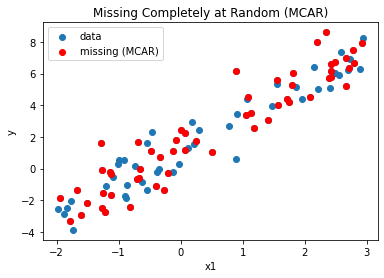

In [19]:
# To illustrate MCAR, remove half of the values for x1

## randomly mark half of x1 smaples as missing MCAR
# independed of any information recorded
idx_mcar = np.random.choice([0,1], size=(100,)) == 1  # ndarray (100,), values are boolean type

plt.scatter(x1, y, label = 'data')
plt.scatter(x1[idx_mcar], y[idx_mcar], label='missing (MCAR)', color='red')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.title("Missing Completely at Random (MCAR)")

red mark(MCAR)은 x1의 값이나 다른 어떤 변수의 값과 관련이 없다.

# Missing at Random(MAR)
한 변수에서 랜덤한 결측치의 확률은 오직 다른 predictors안에 가능한 정보에만 의존한다.
- e.g. \
남자와 여자에게 "육아휴직을 간적이 있냐"는 질문에 대한 대답을 할때, 남자는 여자와 비교되는 다른 비율로 그 질문에 대한 대답을 무시하는 경향 있었다. \
MARs는 다른 predictors의 information을 사용해 다뤄진다 모델을 만들기 위해서 그리고 missing entry에 대한 값을 지우기 위해. \
simulate MAR by removeing x1 values depedning on x2 values. When x2 has the value 1 then the corresponding x1 is missing

Text(0.5, 1.0, 'dependent predictor - measured')

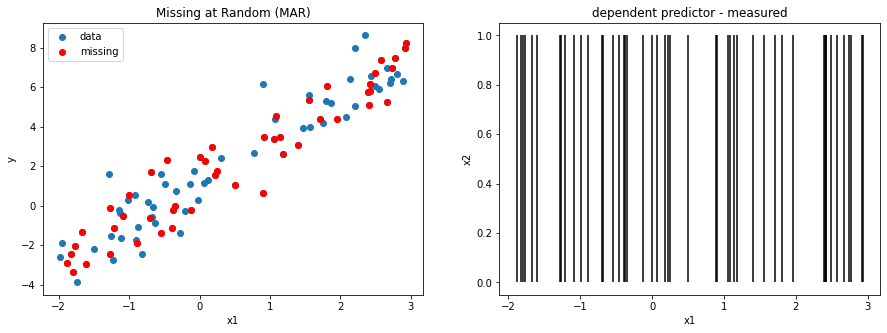

In [29]:
# Missing at Random (MAR)

# randomly mark half of x1 samples as missing MAR
# depending on value of recorded predictor x2

idx_mar = x2 == 1
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(x1, y, label='data')
ax[0].scatter(x1[idx_mar], y[idx_mar], label='missing', color='red')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].set_title('Missing at Random (MAR)')

ax[1].vlines(x1[x2 == 1], 0, 1, color='black')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('dependent predictor - measured')

red-marked(MAR)은 x2에 종속적이다. x2가 1이라는 boolean value를 가지면, x1는 missing value이다.

# Missing Not at Random (MNAR)


Text(0.5, 1.0, 'dependent preditor - not measured')

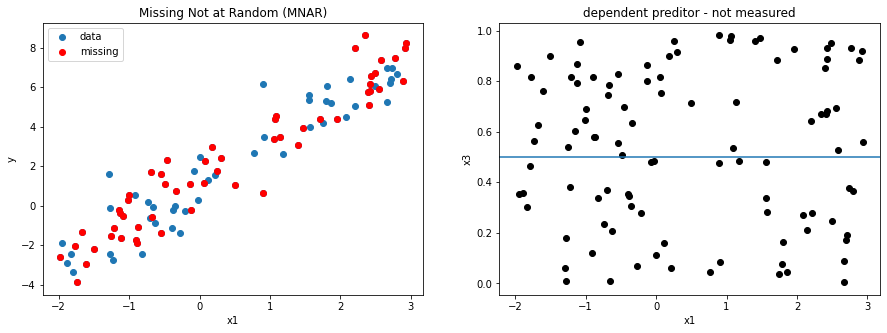

In [7]:
### Missing Not at Random (MNAR)

# randomly mark half of x1 samples as missing MNAR
# depending on unrecorded predictor x3
x3 = np.random.uniform(0, 1, 100)
idx_mnar = x3 > .5

fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].scatter(x1, y, label="data")
ax[0].scatter(x1[idx_mnar], y[idx_mnar], label='missing', color='red')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].set_title("Missing Not at Random (MNAR)")
ax[1].scatter(x1, x3, color="black")
ax[1].axhline(.5, -3, 3)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[1].set_title('dependent preditor - not measured')

## Load Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
pima_df = pd.read_csv("data/missing_data_pima-indians-diabetes.csv")

response = "Outcome"
predictors = pima_df.columns.difference([response]).values

pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.853403,120.922775,69.111257,20.537958,80.070681,31.998429,0.472712,33.248691
std,3.374327,32.039835,19.403339,15.970234,115.431087,7.899591,0.331981,11.771901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.375500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


- Pregnancies: The number of times the patient was pregnant
- 2-hours palsma glucose concentration per 2hours in an oral glucose tolerance test.
- Diastolic blood pressure(mm Hg)
- Triceps skinfold thickness (mm)
- 2-hours serum insulin (mu U/ml)
- Body mass index
- Diabetes pedigree function
- Age (years)
- Outcome (1 for early onset of diabetes within five years, 0 for not)

In [31]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Pregnancies: 0 ~ 17, Glucose, BloodPressure, SkinThickness, Insulin, BMI feature에 0이 포함되는 것은 불가능하다.
처리가 필요

In [15]:
pima_df.isnull().sum(), pima_df.isna().sum()

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64)

누락된 값들은 실제로 None, NaN, Null으로 표현되는데 위 데이터셋은 그렇지 않다.

# First step: properly flag missing values

## Preprocessing

In [17]:
# build preprocessing function
def clean_data(df_raw, cols_with_zeros=['Glucose', 'BloodPressure',
                                       'SkinThickness', 'Insulin', 'BMI'],
                                       response=['Outcome']):
    df = df_raw.copy()
    
    # replace zero with NaN in features
    df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
    
    # remove \ and } from response
    df = df.replace(to_replace=r'\\|\}', value='', regex=True)
    
    # change response data type to int
    df[response] = df[response].astype('int')
    
    return df

pima_df_cleaned = clean_data(pima_df)
pima_df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Replaced any zero and indicated missing values with NaN

## Exploring missing values

In [18]:
print("Proportion of missing values")
missing_values_count = pima_df_cleaned.isna().sum()*100/pima_df_cleaned.shape[0]
features_with_missing_values = missing_values_count[missing_values_count>0].index.values
missing_values_count

Proportion of missing values


Pregnancies                  0.000000
Glucose                      0.654450
BloodPressure                4.581152
SkinThickness               29.581152
Insulin                     48.560209
BMI                          1.439791
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

feature가 MAR, MCAR, MNAR인 가설의 통계적 검증을 수행할 필요가 있을 수 있다. \
SkinThickness의 결측치는 Insulin의 결측치와 연관되어 있어 보인다. SkinThickness가 없으면, Insulin도 없다. \
BloodPressure or BMI가 없으면, Insulin or SkinThickness 값은 역시 없을 가능성이 높다.

# Second Step: Statisical tests of the hypothesis (MAR, MCAR, MNAR)

In [15]:
# I think measure the correlation with each features

# There are no data in condition of (SkinThickness  == 0 and Insulin != 0) 
pima_df[(pima_df.SkinThickness==0) & (pima_df.Insulin!=0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [16]:
print("number of NaN value in Insulin Column:", len(pima_df_cleaned[pima_df_cleaned.isna()]))
pima_df_cleaned[pima_df_cleaned.Insulin.isna()].head()

number of NaN value in Insulin Column: 764


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


# Third Step: Explore and choose the most appropriate technique to handle missing valuse

- **Drop strategy**: remove all observation where at least on of the features has a missing valuse(NaN)
- **Mean strategy**: replace any missing value (NaN) by the mean of all values available for that feature
- **Median strategy and Mode strategy**: replace missing values by the median or mode values
- **Model-based strategy**: use the features without missing values for training KNN regression models
    - correlation 구하여 두 feautre사이의 상관계수가 높은 feature 사용 Linear regression 모델을 이용
    - improve regression imputation is the stochastic regression imputation. 
    - **Basic mode**: uses features without missing values for predicting the missing values in the ramaining features
    - **Progressive mode**: after filling in missing values, using it for predicting the missing values in the remaining features

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# function for KNN model-based imputation of missing values using features without NaN as predictors
def impute_model_basic(df):
    cols_nan = df.columns[df.isna().any()].tolist()
    cols_no_nan = df.columns.difference(cols_nan).values
    for col in cols_nan:
        test_data = df[df[col].isna()]
        train_data = df.dropna()
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
    return df

# function for KNN model-based imputation of missing values using features without NaN as predictors, 
# including progressively added imputed features
def impute_model_progressive(df):
    cols_nan = df.columns[df.isna().any()].tolist()
    cols_no_nan = df.columns.difference(cols_nan).values
    while len(cols_nan) > 0:
        col = cols_nan[0]
        test_data = df[df[col].isna()]
        train_data = df.dropna()
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
        cols_nan = df.columns[df.isna().any()].tolist()
        cols_no_nan = df.columns.difference(cols_nan).values
    return df

# function for imputing missing data according to a given impute_strategy:
#  drop_rows: drop all rows with one or more missing values
#  drop_cols: drop columns with one or more missing values
#  model_basic: KNN-model-based imputation with fixed predictors
#  model_progressive: KNN-model-based imputation with progressively added predictors
#  mean, median, most_frequent: imputation with mean, median or most frequent values
#
#  cols_to_standardize: if provided, the specified columns are scaled between 0 and 1, after imputation
def impute_data(df_cleaned, impute_strategy=None, cols_to_standardize=None):
    df = df_cleaned.copy()
    if impute_strategy == 'drop_rows':
        df = df.dropna(axis=0)
    elif impute_strategy == 'drop_cols':
        df = df.dropna(axis=1)
    elif impute_strategy == 'model_basic':
        df = impute_model_basic(df)
    elif impute_strategy == 'model_progressive':
        df = impute_model_progressive(df) 
    else:
        arr = SimpleImputer(missing_values=np.nan,strategy=impute_strategy).fit(
            df.values).transform(df.values)
        df = pd.DataFrame(data=arr, index=df.index.values, columns=df.columns.values)
    if cols_to_standardize != None:
        cols_to_standardize = list(set(cols_to_standardize) & set(df.columns.values))
        df[cols_to_standardize] = df[cols_to_standardize].astype('float')
        df[cols_to_standardize] = pd.DataFrame(data=MinMaxScaler().fit(
            df[cols_to_standardize]).transform(df[cols_to_standardize]), 
                                             index=df[cols_to_standardize].index.values,
                                             columns=df[cols_to_standardize].columns.values)
    return df

## Logistic regression with missing data
특정한 대치 전략을 적용한 후 cleaned data를 logistic regression model에 fit한다.
- dropping rows with missing values,
- 결측치가 있는 행을 드랍
- dropping columns with missing values,
- 결측치가 있는 열을 드랍
- imputing missing values with column mean,
- 결측치를 열의 평균으로 대치
- imputing missing values with model-based prediction,
- 결측치를 모델 기반 예측으로 대치
- imputing missing values with progressive model-based prediction
- 결측치를 progressive 모델 기반 예측으로 대치

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer

# function for handling missing values 
# and fitting logistic regression on clean data
def logistic_regression(data, impute_strategy=None,
                        cols_to_standardize=None,
                        test_size=0.25,
                        random_state=9001):
    start = timer()
    
    # store original columns
    original_columns = data.columns.difference(['Outcome'])
    df_imputed = impute_data(data, impute_strategy, cols_to_standardize)
    train_data, test_data = train_test_split(df_imputed, test_size=test_size,
                                             random_state=random_state)
    
    # note which predictor columns were dropped or kept
    kept_columns = df_imputed.columns.difference(['Outcome'])
    dropped_columns = original_columns.difference(df_imputed.columns)
    original_columns = original_columns.difference(['Outcome'])
    
    # prepare tensors
    X_train = train_data.drop(columns=['Outcome'])
    y_train = train_data['Outcome']
    X_test = test_data.drop(columns=['Outcome'])
    y_test = test_data['Outcome']
    
    # model training
    logistic_model = LogisticRegressionCV(cv=10, penalty='l2', max_iter=1000).fit(
        X_train, y_train)
    
    # model evaluation
    train_score = accuracy_score(y_train, logistic_model.predict(X_train))
    test_score = accuracy_score(y_test, logistic_model.predict(X_test))
    duration = timer() - start
    print("Classification rate on training data: {}".format(train_score))
    print("Classification rate on test data: {}".format(test_score))
    print("Execution time: {}".format(duration))
    
    return {
        'imputation strategy': impute_strategy,
        'standardized': cols_to_standardize!=None,
        'model': logistic_model,
        'train score': train_score,
        'test score': test_score,
        'execution time (s)': duration
    }
  
# list to store models' performance  
lr_results = []

# prepare data
pima_df_cleaned = clean_data(pima_df)
cols_to_standardize=['Age','BMI','BloodPressure','Glucose','Insulin','Pregnancies','SkinThickness','DiabetesPedigreeFunction']

# fit logistic regression for each imputation strategy
# with and without standardizing features
for impute_strategy in ['drop_rows', 'mean', 'model_basic', 'model_progressive']:
    for cols in [None, cols_to_standardize]:   
        result = logistic_regression(pima_df_cleaned, impute_strategy=impute_strategy, cols_to_standardize=cols)
        lr_results.append(result)

# display logistic regression performance
lr_results_df = pd.DataFrame(lr_results)
lr_results_df.drop(['model'], axis=1).drop_duplicates()

Classification rate on training data: 0.8225255972696246
Classification rate on test data: 0.7040816326530612
Execution time: 1.2500921800383367
Classification rate on training data: 0.825938566552901
Classification rate on test data: 0.6938775510204082
Execution time: 0.28178259200649336
Classification rate on training data: 0.7731239092495636
Classification rate on test data: 0.7591623036649214
Execution time: 1.2766870720079169
Classification rate on training data: 0.7661431064572426
Classification rate on test data: 0.7591623036649214
Execution time: 0.2963578720227815
Classification rate on training data: 0.7696335078534031
Classification rate on test data: 0.7801047120418848
Execution time: 1.3256841359543614
Classification rate on training data: 0.7713787085514834
Classification rate on test data: 0.774869109947644
Execution time: 0.2913772939937189
Classification rate on training data: 0.7818499127399651
Classification rate on test data: 0.7696335078534031
Execution time: 1.261

,imputation strategy,standardized,train score,test score,execution time (s)
0,drop_rows,False,0.822526,0.704082,1.250092
1,drop_rows,True,0.825939,0.693878,0.281783
2,mean,False,0.773124,0.759162,1.276687
3,mean,True,0.766143,0.759162,0.296358
4,model_basic,False,0.769634,0.780105,1.325684
5,model_basic,True,0.771379,0.774869,0.291377
6,model_progressive,False,0.781850,0.769634,1.261359
7,model_progressive,True,0.787086,0.764398,0.297805


### 대치가 예측된 매개변수의 값과 그들의 정확도에 미치는 중요한 영향에 대해 주목할 가치가 있다.

#### Effect of dropping strategy on accuracy: 제거 전략의 정확도에 대한 영향
결측치가 있는 행과 열을 제거함으로서, 우리는 반응 변수에 대한 중요한 영향을 가지고 있을 수도 있는 중요한 정보를 잃을 수 있다.
그 결과는 training dataset에 오버피팅 되고 test dataset에 대한 안좋은 예측 성능이다.

#### Effect of mean/model imputation on accuracy: 평균/모델 대치의 정확도에 대한 영향
결측 데이터의 평균 대치는 오버피팅을 줄이고 test dataset에 대한 예측을 향상시킨다. \
결측 데이터 대치 시 model 기반이 사용될때 분류가 제일 좋다. 왜냐하면 k-nearest neighbors을 결측 데이터 교체로 사용시 그 데이터의 원래 분산에 더 잘 근접하기 때문이다.  

#### Effect of imputation on training time: 대치의 학습 시간에 대한 영향
계산 복잡성은 대치의 누적 수행 시간, logistic regression model fitting, 예측의 측정에 의해 평가된다. \
모델 기반 접근에 대한 수행 시간은 예측 변수가 표준화되지 않았을 때 가장 높다. 가장 가까운 이웃에 대한 유클리드 거리를 계산하는 것은 데이터의 평균을 계산하는 것보다 더 많은 실행 시간이 필요하다. \
매우 큰 관측치를 처리할 때, 분류 정확도가 낮은 대신 우리는 평균 대치를 선호한다. 

#### Effect of imputation on inference: 대치의 추론에 대한 영향
우리는 그 정규화된 logistic regression models에 의해 예측된 계수를 회수할 수 있다. 아래와 같이

In [32]:
# get index of strategies
lr_results_df = pd.DataFrame(lr_results)
strategies = lr_results_df['imputation strategy']

# get a boolean array where True => standardized
standardized = lr_results_df['standardized']
st = lambda s: ' standardized' if s else ''
coefs_ = {}
for key, value in enumerate(strategies):
    if value == 'drop_cols':
        # skip
        pass
    else:
        strategy = value + st(standardized[key])
        coefs_[strategy] = lr_results_df['model'][key].coef_[0]
coef_df = pd.DataFrame(data=coefs_, index=predictors)
coef_df.T

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
drop_rows,0.042894,0.045141,0.005913,-0.001516,-0.002136,0.082871,0.885856,0.031678
drop_rows standardized,0.735836,6.392153,0.557034,-0.077534,-1.753578,4.024592,2.227690,1.886384
mean,0.152794,0.039292,-0.010179,-0.008114,-0.000724,0.104550,0.978277,0.015349
mean standardized,2.518595,5.928161,-0.840922,-0.511167,-0.451331,4.821429,2.281098,0.915101
model_basic,0.149625,0.038517,-0.008356,0.000333,-0.000327,0.095849,0.948578,0.014541
model_basic standardized,2.544475,5.990200,-0.754568,0.053903,-0.275382,4.704462,2.339150,0.885368
model_progressive,0.151302,0.041058,-0.013029,-0.000465,-0.001384,0.101240,0.961410,0.015520
model_progressive standardized,2.584038,6.419168,-1.223196,-0.042236,-1.187678,5.013827,2.384934,0.948373


표의 그 계수들은 얼마나 각 예측변수가 당뇨 발생의 가능도에 영향을 미치는지 보여준다. \
양수 값들은 당뇨 발생에 유리한 요인을 나타낸다. \
0에 근접한 값들은 그 관련된 예측 변수들이 당뇨 발병에 크게 기여하지 않는 다는 것을 나타낸다. \
그 표는 결측 데이터에 대한 대치 전략을 적용한 후의 추론된 계수들을 보여준다. 계수는 역시 정규화된 예측 변수의 값들에 logistic regression에 적합된 것에 의해 얻어진 것으로 제공된다 (대치 이후)
- 전반적으로 표준화된 계수들이 더 크다.
- 행/열이 제거되었을 때, 결측 데이터가 평균이나 모델에 의해 대치되었을 때의 그들의 값들과 비교하여 그 계수 예측값들이 크게 바뀐다.
- 인슐린에 대한 계수는 대치 방법에 따라 크게 다르지 않다. 인슐린은 모든 예측 변수 사이에서 결측치의 비율이 가장 높다. 이것은 인슐린이 MCAR일 것을 시사한다.

다음 표는 누락 된 데이터가있는 행을 삭제 한 후 얻은 계수 크기에 대한 평균 대치 및 모델 기반 대치의 효과를 비교합니다.

In [35]:
coef_perc_df = coef_df.copy()
cols = coef_df.columns.difference(['drop_rows']).values
for col in cols:
    coef_perc_df[col] = np.round(100*(coef_df[col]/coef_df['drop_rows']-1))
coef_perc_df[['drop_rows','mean','model_basic','model_progressive']]

,drop_rows,mean,model_basic,model_progressive
Age,0.042894,256.0,249.0,253.0
BMI,0.045141,-13.0,-15.0,-9.0
BloodPressure,0.005913,-272.0,-241.0,-320.0
DiabetesPedigreeFunction,-0.001516,435.0,-122.0,-69.0
Glucose,-0.002136,-66.0,-85.0,-35.0
Insulin,0.082871,26.0,16.0,22.0
Pregnancies,0.885856,10.0,7.0,9.0
SkinThickness,0.031678,-52.0,-54.0,-51.0


첫 번째 열에는 누락 된 값이있는 행이 제거 된 데이터에 대해 학습 된 로지스틱 모델에 대한 계수 추정값이 표시됩니다. \
다른 열은 드롭 전략과 비교하여 결 측값을 대치 한 후 계수 값의 백분율 변화를 보여줍니다. \
연령, 혈압 및 혈통 기능은 행 삭제와 평균 / 모델 기반 대치 사이에서 가장 높은 백분율 변화를 보입니다. \
드롭 전략은 일반적으로 황금 방법이 아닙니다.


## 결론
이 기사에서는 데이터를 정리하고 누락 된 값을 처리하는 것이 Machine Learning 알고리즘의 성능을 훨씬 더 향상시키는 방법을 보여주었습니다.
MCAR, MAR, MNAR 유형의 결측 데이터를 구별하는 것은 추론 및 예측에 상당한 영향을 미칠 수 있기 때문에 필수적입니다.
누락 된 데이터를 처리하는 완벽한 방법은 없지만 사용 가능한 다른 방법을 알고 있어야합니다.
누락 된 데이터를 보상하고 그로부터 얻은 통찰력을 활용하는 것은 데이터 과학자의 업무에서 시간이 많이 걸리는 부분 중 하나입니다.